In [ ]:
import pandas as pd

# **Data Loading and Preprocessing**

In [ ]:
# Load the dataset
df=pd.read_csv('sales_data.csv')

In [ ]:
# Fill missing values with 0
df.fillna(0,inplace=True)

In [ ]:
# Check for any remaining missing values
print(df.isnull().sum())

Customer ID     0
Order ID        0
Order Date      0
Product ID      0
Product Name    0
Category        0
Quantity        0
Unit Price      0
Region          0
Total Amount    0
dtype: int64


In [ ]:
# Preview the first 10 'Order Date' entries
print(df['Order Date'].head(10))

0    2021-12-25
1    2022-10-08
2    2022-11-30
3    2023-02-12
4    2023-02-17
5    2022-02-16
6    2021-10-25
7    2022-01-19
8    2022-11-21
9    2021-08-21
Name: Order Date, dtype: object


In [ ]:
# Check the data type of 'Order Date'
print(df['Order Date'].dtype)

object


In [ ]:
# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%Y-%m-%d')

In [ ]:
# Confirm the data type conversion
print(df['Order Date'].dtype)

datetime64[ns]


In [ ]:
# Identify and count duplicate rows
df[df.duplicated()]


,Customer ID,Order ID,Order Date,Product ID,Product Name,Category,Quantity,Unit Price,Region,Total Amount


In [ ]:
df.duplicated().sum()

0

# **Recency, Frequency, Monetary (RFM) Analysis**

In [ ]:
# Calculate Recency (days since last purchase)
df['Recency'] = (df['Order Date'].max() - df['Order Date']).dt.days
df['Recency']

,Recency
0,602
1,315
2,262
3,188
4,183
...,...
358,197
359,650
360,564
361,184


In [ ]:
# Group by 'Customer ID' and calculate the average Recency
recency_df = df.groupby('Customer ID')['Recency'].mean().reset_index()
recency_df.columns = ['Customer ID', 'Recency']


In [ ]:
recency_df

,Customer ID,Recency
0,005612ec-5aea-48d6-9a6d-cdf0f538f4da,442.0
1,01329251-44d2-4ed4-b3cb-0d6b13a4712f,184.0
2,015cda0c-7c05-45ab-8438-ac338a7db94c,511.0
3,018c6e2c-9c84-45e1-991b-9310c5e174a5,254.0
4,02167aaa-8387-4e7e-b1fe-30c87b9a52ed,386.0
...,...,...
358,fd5a88d2-584d-42fb-9ab9-08cf53a511ad,577.0
359,fd7d850c-3b09-4df0-b68f-71faec768636,263.0
360,fe2e53a6-1073-48d5-b22b-68e75653efb4,106.0
361,fed141ce-2d8b-4be3-b88c-34c2f858b37f,221.0


In [ ]:
# Group by 'Customer ID' and calculate the Frequency (number of orders)
frequency_df = df.groupby('Customer ID')['Order ID'].count().reset_index()
frequency_df.columns = ['Customer ID', 'Frequency']


In [ ]:
frequency_df

,Customer ID,Frequency
0,005612ec-5aea-48d6-9a6d-cdf0f538f4da,1
1,01329251-44d2-4ed4-b3cb-0d6b13a4712f,1
2,015cda0c-7c05-45ab-8438-ac338a7db94c,1
3,018c6e2c-9c84-45e1-991b-9310c5e174a5,1
4,02167aaa-8387-4e7e-b1fe-30c87b9a52ed,1
...,...,...
358,fd5a88d2-584d-42fb-9ab9-08cf53a511ad,1
359,fd7d850c-3b09-4df0-b68f-71faec768636,1
360,fe2e53a6-1073-48d5-b22b-68e75653efb4,1
361,fed141ce-2d8b-4be3-b88c-34c2f858b37f,1


In [ ]:
# Group by 'Customer ID' and calculate the Monetary value (total amount spent)
monetary_df = df.groupby('Customer ID')['Total Amount'].sum().reset_index()
monetary_df.columns = ['Customer ID', 'Monetary']


In [ ]:
monetary_df

,Customer ID,Monetary
0,005612ec-5aea-48d6-9a6d-cdf0f538f4da,720.52
1,01329251-44d2-4ed4-b3cb-0d6b13a4712f,3356.50
2,015cda0c-7c05-45ab-8438-ac338a7db94c,1641.24
3,018c6e2c-9c84-45e1-991b-9310c5e174a5,2746.70
4,02167aaa-8387-4e7e-b1fe-30c87b9a52ed,2010.51
...,...,...
358,fd5a88d2-584d-42fb-9ab9-08cf53a511ad,3358.80
359,fd7d850c-3b09-4df0-b68f-71faec768636,2821.38
360,fe2e53a6-1073-48d5-b22b-68e75653efb4,373.56
361,fed141ce-2d8b-4be3-b88c-34c2f858b37f,3077.01


In [ ]:
# Merge Recency, Frequency, and Monetary dataframes
rfm_df = recency_df.merge(frequency_df, on='Customer ID').merge(monetary_df, on='Customer ID')


In [ ]:
rfm_df

,Customer ID,Recency,Frequency,Monetary
0,005612ec-5aea-48d6-9a6d-cdf0f538f4da,442.0,1,720.52
1,01329251-44d2-4ed4-b3cb-0d6b13a4712f,184.0,1,3356.50
2,015cda0c-7c05-45ab-8438-ac338a7db94c,511.0,1,1641.24
3,018c6e2c-9c84-45e1-991b-9310c5e174a5,254.0,1,2746.70
4,02167aaa-8387-4e7e-b1fe-30c87b9a52ed,386.0,1,2010.51
...,...,...,...,...
358,fd5a88d2-584d-42fb-9ab9-08cf53a511ad,577.0,1,3358.80
359,fd7d850c-3b09-4df0-b68f-71faec768636,263.0,1,2821.38
360,fe2e53a6-1073-48d5-b22b-68e75653efb4,106.0,1,373.56
361,fed141ce-2d8b-4be3-b88c-34c2f858b37f,221.0,1,3077.01


# **Scoring RFM Metrics**

In [ ]:
# Define quartiles for Recency and Monetary using qcut
recency_quartiles = pd.qcut(rfm_df['Recency'], 4, labels=False, duplicates='drop')
monetary_quartiles = pd.qcut(rfm_df['Monetary'], 4, labels=False, duplicates='drop')

# Adjust Frequency quartiles calculation using pd.cut
frequency_quartiles = pd.cut(rfm_df['Frequency'], bins=4, labels=False, duplicates='drop')

In [ ]:
# Assign scores (higher is better)
rfm_df['Recency Score'] = 4 - recency_quartiles
rfm_df['Frequency Score'] = frequency_quartiles + 1
rfm_df['Monetary Score'] = monetary_quartiles + 1

In [ ]:
# Create a total RFM score by summing individual scores
rfm_df['RFM Score'] = rfm_df['Recency Score'] + rfm_df['Frequency Score'] + rfm_df['Monetary Score']

# **Customer Segmentation Based on RFM**

In [ ]:
# Define a function to classify customers based on RFM scores
def classify_customer(row):
    if row['Recency Score'] >= 3 and row['Monetary Score'] >= 3:
        return 'High-Value Customer'
    elif row['Recency Score'] <= 2 and row['Monetary Score'] <= 2:
        return 'At-Risk Customer'
    else:
        return 'New Customer'

# Apply the classification
rfm_df['Customer Segment'] = rfm_df.apply(classify_customer, axis=1)

In [ ]:
# Preview the first 10 rows of the classified data
print(rfm_df[['Customer ID', 'Recency Score', 'Frequency Score', 'Monetary Score', 'Customer Segment']].head(10))

                            Customer ID  Recency Score  Frequency Score  \
0  005612ec-5aea-48d6-9a6d-cdf0f538f4da              2                2   
1  01329251-44d2-4ed4-b3cb-0d6b13a4712f              4                2   
2  015cda0c-7c05-45ab-8438-ac338a7db94c              2                2   
3  018c6e2c-9c84-45e1-991b-9310c5e174a5              3                2   
4  02167aaa-8387-4e7e-b1fe-30c87b9a52ed              2                2   
5  02406387-ff72-4721-93d8-f102e869c4b7              1                2   
6  03693cb7-c0c4-4d76-9b8e-4326b964e2b6              1                2   
7  03e71c3f-6f5e-441b-971d-000721a0651d              2                2   
8  048dcc59-2b7a-4edb-8d7b-1b847411b658              2                2   
9  04e780a1-dcff-4fc5-8f2a-7ed055f27220              1                2   

   Monetary Score     Customer Segment  
0               2     At-Risk Customer  
1               4  High-Value Customer  
2               3         New Customer  
3         

# **Distribution of Customer Segments**

In [ ]:
# Count the number of customers in each segment
print(rfm_df['Customer Segment'].value_counts())


Customer Segment
New Customer           185
At-Risk Customer        89
High-Value Customer     89
Name: count, dtype: int64


# **Sales Trends Analysis**

In [ ]:
# Extract Year and Month from 'Order Date'
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

# Ensure 'Total Amount' is numeric
df['Total Amount'] = pd.to_numeric(df['Total Amount'], errors='coerce')


In [ ]:
# Monthly Sales Trends
monthly_sales = df.groupby(['Year', 'Month'])['Total Amount'].sum().reset_index()

# Yearly Sales Trends
yearly_sales = df.groupby('Year')['Total Amount'].sum().reset_index()

# Display Monthly Sales Trends
print("Monthly Sales Trends:")
print(monthly_sales)

# Display Yearly Sales Trends
print("\nYearly Sales Trends:")
print(yearly_sales)


Monthly Sales Trends:
    Year  Month  Total Amount
0   2021      8      17021.38
1   2021      9      19482.53
2   2021     10      24312.71
3   2021     11      28496.76
4   2021     12      15959.63
5   2022      1      24656.45
6   2022      2       8925.77
7   2022      3      17441.87
8   2022      4      17428.87
9   2022      5      16781.01
10  2022      6      20355.92
11  2022      7      20559.08
12  2022      8      21523.70
13  2022      9      19482.72
14  2022     10      26489.25
15  2022     11      24307.03
16  2022     12      18340.49
17  2023      1      28984.86
18  2023      2      22209.53
19  2023      3      21545.69
20  2023      4      16136.30
21  2023      5      15831.33
22  2023      6       9370.07
23  2023      7      24057.27
24  2023      8      11598.28

Yearly Sales Trends:
   Year  Total Amount
0  2021     105273.01
1  2022     236292.16
2  2023     149733.33


# **Product Category Performance**

In [ ]:
# Calculate sales by product category
category_sales = df.groupby('Category')['Total Amount'].sum().reset_index()
print("Product Category Performance:")
print(category_sales)


Product Category Performance:
         Category  Total Amount
0     Accessories      87386.95
1           Books     115120.41
2        Clothing      94677.73
3     Electronics     101544.99
4  Home & Kitchen      92568.42


# **Sales by Region**

In [ ]:
# Calculate sales by region
region_sales = df.groupby('Region')['Total Amount'].sum().reset_index()
print("Sales by Region:")
print(region_sales)


Sales by Region:
  Region  Total Amount
0   East     140332.35
1  North     116418.31
2  South     128528.63
3   West     106019.21


# **Data Visualization**

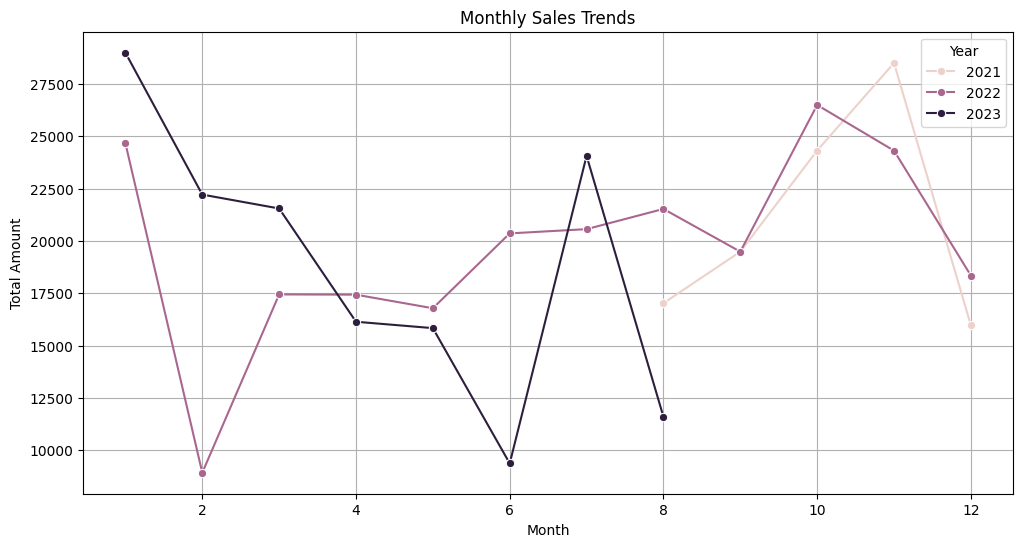

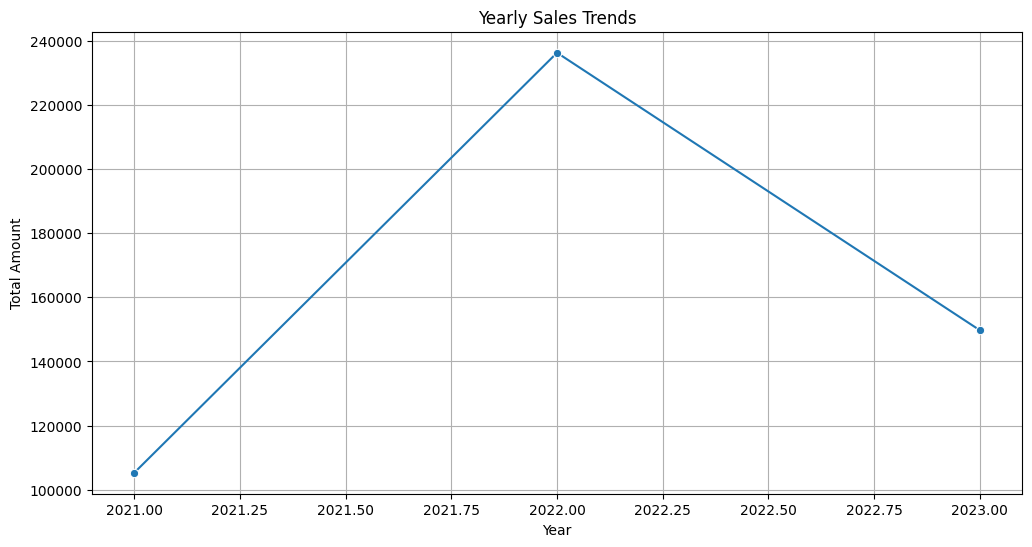

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Line chart for Monthly Sales Trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Total Amount', hue='Year', marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.legend(title='Year')
plt.grid(True)
plt.show()

# Line chart for Yearly Sales Trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_sales, x='Year', y='Total Amount', marker='o')
plt.title('Yearly Sales Trends')
plt.xlabel('Year')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()


<ipython-input-31-ff8104429f4e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_sales, x='Category', y='Total Amount', palette='viridis')


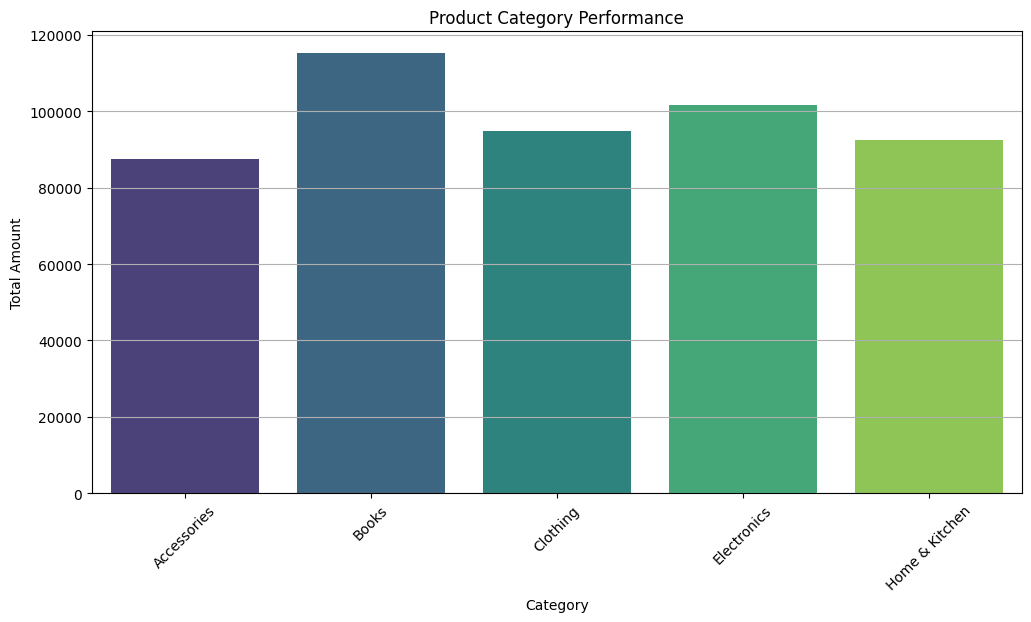

In [ ]:
# Plot Product Category Performance
plt.figure(figsize=(12, 6))
sns.barplot(data=category_sales, x='Category', y='Total Amount', palette='viridis')
plt.title('Product Category Performance')
plt.xlabel('Category')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


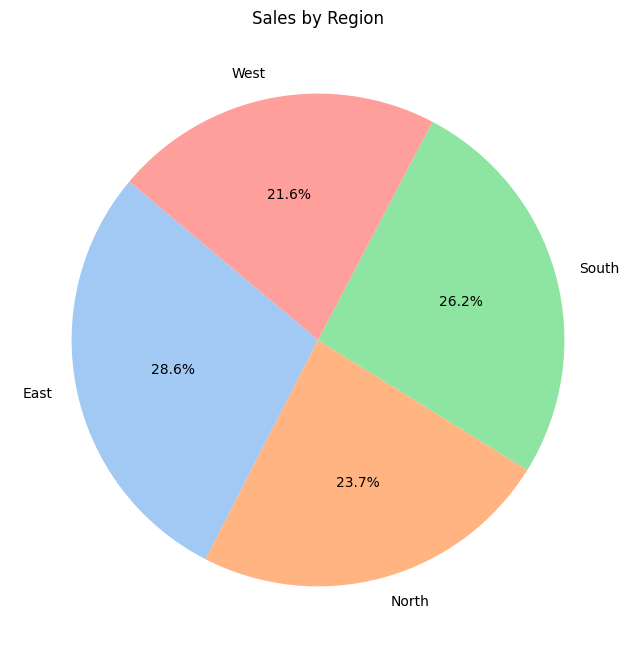

In [ ]:
# Plot Sales by Region (Pie Chart)
plt.figure(figsize=(8, 8))
plt.pie(region_sales['Total Amount'], labels=region_sales['Region'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Sales by Region')
plt.show()
